In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [40]:
x=pd.read_csv('Training Data/Logistic_X_Train.csv')
y=pd.read_csv('Training Data/Logistic_Y_Train.csv')

In [41]:
x.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [42]:
y.head()

,label
0,1
1,1
2,1
3,0
4,0


In [43]:
x=x.values 
y=y.values 

In [44]:
print(x.shape,y.shape)

(3000, 3) (3000, 1)


<IPython.core.display.Javascript object>


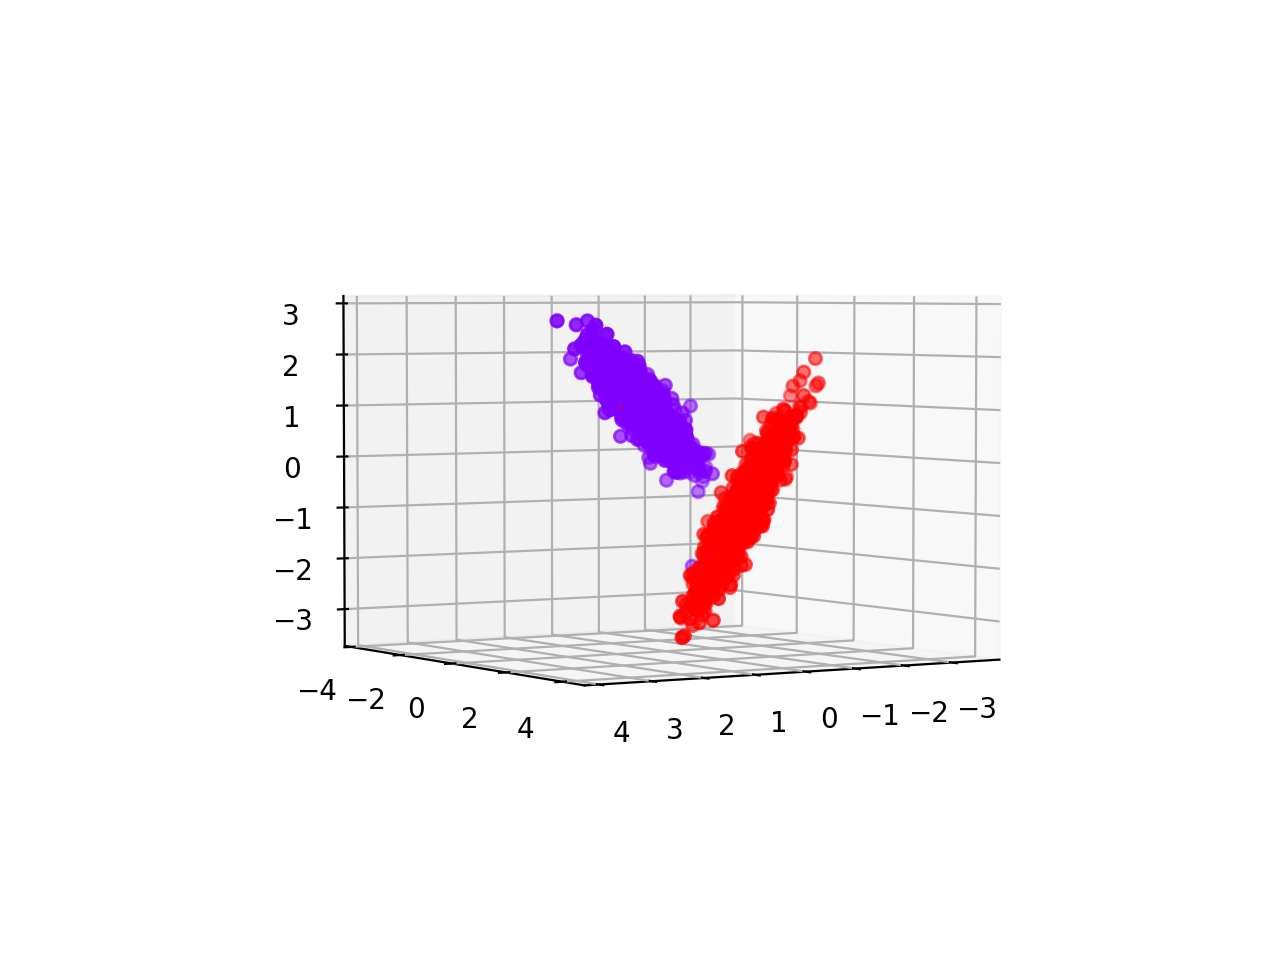

In [46]:
fig=plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x[: ,0], x[: ,1], x[: ,2], cmap='rainbow',c=y)
plt.show()


In [47]:
ones = np.ones((x.shape[0],1))
ones=ones.astype('int')
print(ones.shape)

(3000, 1)


In [48]:
x=np.hstack((ones,x))
print(x)

[[ 1.         -1.23937466  0.74910149 -0.52851491]
 [ 1.         -1.03607028  0.80143631 -1.28371152]
 [ 1.         -0.61557914  1.57952053 -1.39192706]
 ...
 [ 1.          0.08827657  1.63878904 -2.19364056]
 [ 1.          1.52515501  0.85923429  1.50530791]
 [ 1.         -0.97981744  0.56395376 -1.53939416]]


In [77]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))
def hypthesis(X,theta):
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):
    
    hi=hypthesis(X,theta)
    e= -1*np.mean(y*np.log(hi)+(1-y)*(np.log(1-hi))) #Elemnt wise multiplication
     
    return e  

def gradient(X,y,theta):
    
    hi=hypthesis(X,theta)
    grad=np.dot(X.T,(y-hi))
    
    return grad/X.shape[0]

def gradient_descent(X,y,lr=0.5,max_steps=500):
    
    n=X.shape[1]
    theta=np.zeros((n,1))
    error_list=[]
    
    for i in range(max_steps):
        e=error(X,y,theta)
        error_list.append(e)
        
        grad=gradient(X,y,theta)
        theta=theta+lr*grad
        
    return theta,error_list
    
    

In [78]:
theta,errorlist=gradient_descent(x,y)
print(theta)

[[-2.75210904]
 [-2.91440796]
 [ 2.17155964]
 [-2.43997977]]


In [79]:
print(errorlist)

[0.6931471805599454, 0.48258632385497596, 0.3799113245508938, 0.320109087614848, 0.2808896678995969, 0.25306803420200885, 0.2322045183832779, 0.21590003601518865, 0.2027475177266809, 0.19186809532814167, 0.1826846872030325, 0.17480264208330618, 0.16794280464338154, 0.16190201626415185, 0.15652878723043318, 0.15170775726573502, 0.14734945299873042, 0.14338334955666468, 0.1397530560132085, 0.13641290263466585, 0.13332547535727876, 0.1304598039321378, 0.12779000976791693, 0.1252942826387304, 0.1229540963468962, 0.12075360049343256, 0.11867914373792585, 0.11671889641575042, 0.11486254906656933, 0.11310106955695202, 0.11142650586192546, 0.10983182474179164, 0.10831077887223037, 0.10685779670340971, 0.10546789060734232, 0.10413657984076512, 0.10285982558732196, 0.10163397590779863, 0.10045571886391165, 0.09932204242126495, 0.09823020000378153, 0.09717768078241142, 0.09616218394809409, 0.0951815963525088, 0.09423397300744424, 0.0933175200202847, 0.09243057961346396, 0.09157161693313613, 0.090

<IPython.core.display.Javascript object>


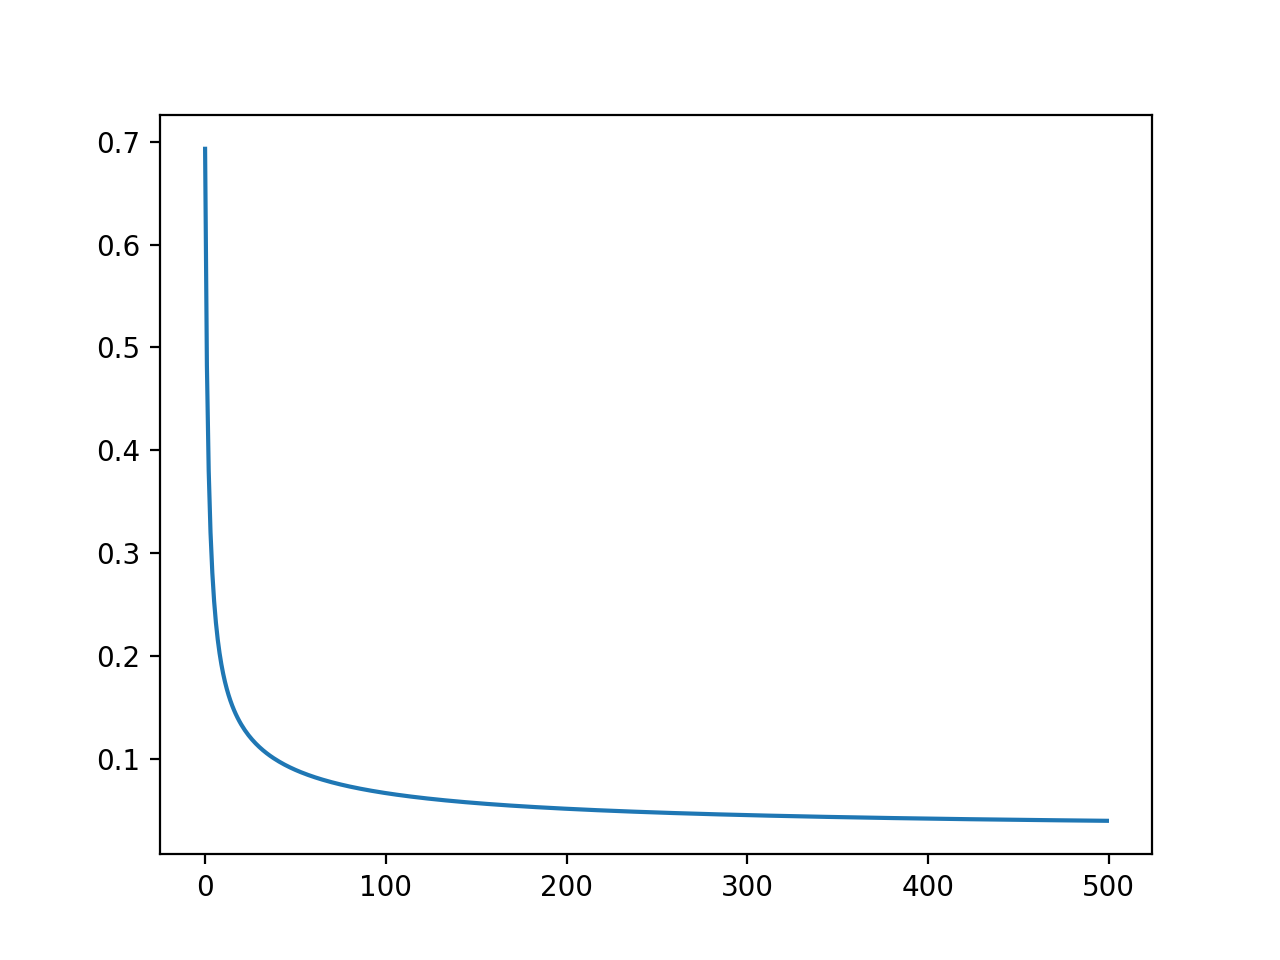

[]

In [81]:
plt.plot(errorlist)
plt.plot()

In [86]:
def prediction(X,theta):
    y_=hypthesis(X,theta)
    output=np.zeros(y_.shape)
    output=output.astype('int')
    output[y_>=0.5]=1
    return output

x_train_preds=prediction(x,theta)

In [88]:
def accuracy(x,y):
    
    acc=np.sum(x==y)/x.shape[0]
    return acc*100

In [90]:
accuracy(x_train_preds,y)

99.4

In [93]:
x_train=pd.read_csv('Test Cases/Logistic_X_Test.csv')
x_train.head()

,f1,f2,f3
0,-0.767508,-0.261859,-2.514831
1,-1.241653,1.449001,-0.413089
2,1.925270,1.931761,1.342619
3,-1.298255,1.049761,-0.527319
4,-0.964712,0.938088,-1.186328


In [94]:
x_train=x_train.values
x_train.shape

(1000, 3)

In [100]:
ones=np.ones((x_train.shape[0],1))
x_train=np.hstack((ones,x_train))
print(x_train)

[[ 1.         -0.76750773 -0.2618595  -2.51483147]
 [ 1.         -1.24165258  1.44900144 -0.4130893 ]
 [ 1.          1.92527007  1.93176097  1.34261917]
 ...
 [ 1.         -1.18696873  0.94734729 -0.78638597]
 [ 1.         -0.53232395  1.84516978 -0.9935503 ]
 [ 1.          0.54023217  0.58099406  0.38664901]]


In [101]:
x_train_preds=prediction(x_train,theta)


In [102]:
print(x_train_preds)

[[1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]


In [104]:
submission=pd.DataFrame(data=x_train_preds,columns=['label'])
submission.head()

,label
0,1
1,1
2,0
3,1
4,1


In [105]:
submission.to_csv('sub.csv',index=False`)

SyntaxError: invalid syntax (<ipython-input-105-39ba2babe56f>, line 1)